## ACS Data: Transportation Statistics, LA County

**Author:** *Rebecca Saavedra Swint*


Using the American Community Survey (pulled on January 27, 2023), I will attempt to understand transportation and car ownership rates in Los Angeles County. Later, we will explore car accident data to understand where accidents occur, and what geographic components might contribute to higher accident rates in certain areas. 

### Import data from pandas

To work with data in python, we need a library that will let us handle "data exploration." For this, we are using pandas library.

In [1]:
import pandas as pd

Next, we load the data that I downloaded from Social Explorer. Because there is a known issue with leading zeros in Census data, we import certain lines as strings, not intergers. 

In [2]:
df = pd.read_csv(
    'data/CommuteTimes.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY':str
    }
)

### Preliminary inspection

A quick look at the size of the data

In [3]:
df.shape

(2498, 96)

In [4]:
# This will show us if Geo_FIPS imported correctly with the leading zero.
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A09002A_006,SE_A09002A_007,SE_A09002B_001,SE_A09002B_002,SE_A09002B_003,SE_A09002B_004,SE_A09002B_005,SE_A09002B_006,SE_A09002B_007,SE_A09003_001
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,1581,1810,1862,1851,1563,916,514,281,52,32.0
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,1423,1634,1712,1712,1572,1096,619,289,78,37.0
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,1498,1626,1632,1604,1321,958,280,134,6,29.0
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,1381,1582,1658,1631,1527,970,556,277,76,35.0
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,1021,1084,1084,1004,775,449,96,63,0,24.0


In [5]:
# Now we need to see which columns have empty values, using .all()
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [6]:
# Let's drop all the columns withh null data using 'dropna()' 
df=df.dropna(axis=1,how="all")

In [7]:
# Let's check if that worked
df.columns[df.isna().all()].tolist()

[]

### Overwriting default display settings

Instead of viewing the default first and last 10 columns, we are viewing all.

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df.sample()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_A09001_001,SE_A09001_002,SE_A09001_003,SE_A09001_004,SE_A09001_005,SE_A09001_006,SE_A09001_007,SE_A09001_008,SE_A09001_009,SE_A09001_010,SE_B09001_001,SE_B09001_002,SE_B09001_003,SE_B09001_004,SE_B09001_005,SE_B09001_006,SE_B09001_007,SE_B09001_008,SE_A09002_001,SE_A09002_002,SE_A09002_003,SE_A09002_004,SE_A09002_005,SE_A09002_006,SE_A09002_007,SE_A09002_008,SE_A09002A_001,SE_A09002A_002,SE_A09002A_003,SE_A09002A_004,SE_A09002A_005,SE_A09002A_006,SE_A09002A_007,SE_A09002B_001,SE_A09002B_002,SE_A09002B_003,SE_A09002B_004,SE_A09002B_005,SE_A09002B_006,SE_A09002B_007,SE_A09003_001
2250,06037701000,"Census Tract 7010, Los Angeles County, California",ACSSF,ca,140,0,6450,06,037,701000,14000US06037701000,Census Tract 7010,2823,1972,399,576,399,270,198,96,34,851,1972,399,576,399,270,198,96,34,1972,17,717,640,333,135,96,34,1972,17,734,1374,1707,1842,1938,1972,1955,1238,598,265,130,34,22.0


### Data Types

To get the data types, we will use `.info().` 

In [10]:
# look at the data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geo_FIPS        2498 non-null   object 
 1   Geo_QName       2498 non-null   object 
 2   Geo_FILEID      2498 non-null   object 
 3   Geo_STUSAB      2498 non-null   object 
 4   Geo_SUMLEV      2498 non-null   int64  
 5   Geo_GEOCOMP     2498 non-null   int64  
 6   Geo_LOGRECNO    2498 non-null   int64  
 7   Geo_STATE       2498 non-null   object 
 8   Geo_COUNTY      2498 non-null   object 
 9   Geo_TRACT       2498 non-null   int64  
 10  Geo_GEOID       2498 non-null   object 
 11  Geo_NAME        2498 non-null   object 
 12  SE_A09001_001   2498 non-null   int64  
 13  SE_A09001_002   2498 non-null   int64  
 14  SE_A09001_003   2498 non-null   int64  
 15  SE_A09001_004   2498 non-null   int64  
 16  SE_A09001_005   2498 non-null   int64  
 17  SE_A09001_006   2498 non-null   i

### Assigning data types on import

Let's take a closer look at the column that will become our unique identifier, `Geo_FIPS`.

In [11]:
df.Geo_FIPS.head()

0    06037101110
1    06037101122
2    06037101220
3    06037101221
4    06037101222
Name: Geo_FIPS, dtype: object

In [12]:
df.Geo_STATE.head()

0    06
1    06
2    06
3    06
4    06
Name: Geo_STATE, dtype: object

In [13]:
df.Geo_COUNTY.head()

0    037
1    037
2    037
3    037
4    037
Name: Geo_COUNTY, dtype: object

Since leading zeros are missing, we need to input code to include leading zeros. We do this by re-importing the data, this time, specifying the `FIPS` columns as a string:

In [14]:
df = pd.read_csv(
    'data/CommuteTimes.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [15]:
# now look at the data again
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_PUMA5,Geo_PUMA1,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A09001_001,SE_A09001_002,SE_A09001_003,SE_A09001_004,SE_A09001_005,SE_A09001_006,SE_A09001_007,SE_A09001_008,SE_A09001_009,SE_A09001_010,SE_B09001_001,SE_B09001_002,SE_B09001_003,SE_B09001_004,SE_B09001_005,SE_B09001_006,SE_B09001_007,SE_B09001_008,SE_A09002_001,SE_A09002_002,SE_A09002_003,SE_A09002_004,SE_A09002_005,SE_A09002_006,SE_A09002_007,SE_A09002_008,SE_A09002A_001,SE_A09002A_002,SE_A09002A_003,SE_A09002A_004,SE_A09002A_005,SE_A09002A_006,SE_A09002A_007,SE_A09002B_001,SE_A09002B_002,SE_A09002B_003,SE_A09002B_004,SE_A09002B_005,SE_A09002B_006,SE_A09002B_007,SE_A09003_001
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,1937,1862,129,290,527,256,379,229,52,75,1862,129,290,527,256,379,229,52,1862,11,288,647,402,233,229,52,1862,11,299,946,1348,1581,1810,1862,1851,1563,916,514,281,52,32.0
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,1977,1712,74,129,413,360,447,211,78,265,1712,74,129,413,360,447,211,78,1712,0,140,476,477,330,211,78,1712,0,140,616,1093,1423,1634,1712,1712,1572,1096,619,289,78,37.0
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,1727,1632,206,252,216,392,432,128,6,95,1632,206,252,216,392,432,128,6,1632,28,283,363,678,146,128,6,1632,28,311,674,1352,1498,1626,1632,1604,1321,958,280,134,6,29.0
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,1658,1658,108,244,336,400,293,201,76,0,1658,108,244,336,400,293,201,76,1658,27,104,557,414,279,201,76,1658,27,131,688,1102,1381,1582,1658,1631,1527,970,556,277,76,35.0
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,NaN,06,037,NaN,NaN,101222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,1093,1084,98,254,283,295,91,63,0,9,1084,98,254,283,295,91,63,0,1084,80,229,326,353,33,63,0,1084,80,309,635,988,1021,1084,1084,1004,775,449,96,63,0,24.0


The leading zeros still didn't show up, so we're going to try `zfill`.

In [16]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geo_FIPS        2498 non-null   object 
 1   Geo_QName       2498 non-null   object 
 2   Geo_FILEID      2498 non-null   object 
 3   Geo_STUSAB      2498 non-null   object 
 4   Geo_SUMLEV      2498 non-null   int64  
 5   Geo_GEOCOMP     2498 non-null   int64  
 6   Geo_LOGRECNO    2498 non-null   int64  
 7   Geo_US          0 non-null      float64
 8   Geo_REGION      0 non-null      float64
 9   Geo_DIVISION    0 non-null      float64
 10  Geo_STATECE     0 non-null      float64
 11  Geo_STATE       2498 non-null   object 
 12  Geo_COUNTY      2498 non-null   object 
 13  Geo_COUSUB      0 non-null      float64
 14  Geo_PLACE       0 non-null      float64
 15  Geo_TRACT       2498 non-null   int64  
 16  Geo_BLKGRP      0 non-null      float64
 17  Geo_CONCIT      0 non-null      f

### Drop/Delete null columns

By default, social explorer creates many columns, so we are using `isna()` to remove, and `.all()` to identify. 

In [17]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

To eliminate these, we can use the panda command `.dropna()`. The arguments are `axis=1` to indicate columns, and `axis=0` to eliminate rows, and `how="all"` removes all columns where values are empty.

In [18]:
df = df.dropna(axis=1,how="all")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geo_FIPS        2498 non-null   object 
 1   Geo_QName       2498 non-null   object 
 2   Geo_FILEID      2498 non-null   object 
 3   Geo_STUSAB      2498 non-null   object 
 4   Geo_SUMLEV      2498 non-null   int64  
 5   Geo_GEOCOMP     2498 non-null   int64  
 6   Geo_LOGRECNO    2498 non-null   int64  
 7   Geo_STATE       2498 non-null   object 
 8   Geo_COUNTY      2498 non-null   object 
 9   Geo_TRACT       2498 non-null   int64  
 10  Geo_GEOID       2498 non-null   object 
 11  Geo_NAME        2498 non-null   object 
 12  SE_A09001_001   2498 non-null   int64  
 13  SE_A09001_002   2498 non-null   int64  
 14  SE_A09001_003   2498 non-null   int64  
 15  SE_A09001_004   2498 non-null   int64  
 16  SE_A09001_005   2498 non-null   int64  
 17  SE_A09001_006   2498 non-null   i

In [20]:
# reinspect the data
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_A09001_001,SE_A09001_002,SE_A09001_003,SE_A09001_004,SE_A09001_005,SE_A09001_006,SE_A09001_007,SE_A09001_008,SE_A09001_009,SE_A09001_010,SE_B09001_001,SE_B09001_002,SE_B09001_003,SE_B09001_004,SE_B09001_005,SE_B09001_006,SE_B09001_007,SE_B09001_008,SE_A09002_001,SE_A09002_002,SE_A09002_003,SE_A09002_004,SE_A09002_005,SE_A09002_006,SE_A09002_007,SE_A09002_008,SE_A09002A_001,SE_A09002A_002,SE_A09002A_003,SE_A09002A_004,SE_A09002A_005,SE_A09002A_006,SE_A09002A_007,SE_A09002B_001,SE_A09002B_002,SE_A09002B_003,SE_A09002B_004,SE_A09002B_005,SE_A09002B_006,SE_A09002B_007,SE_A09003_001
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,14000US06037101110,Census Tract 1011.10,1937,1862,129,290,527,256,379,229,52,75,1862,129,290,527,256,379,229,52,1862,11,288,647,402,233,229,52,1862,11,299,946,1348,1581,1810,1862,1851,1563,916,514,281,52,32.0
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,14000US06037101122,Census Tract 1011.22,1977,1712,74,129,413,360,447,211,78,265,1712,74,129,413,360,447,211,78,1712,0,140,476,477,330,211,78,1712,0,140,616,1093,1423,1634,1712,1712,1572,1096,619,289,78,37.0
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,14000US06037101220,Census Tract 1012.20,1727,1632,206,252,216,392,432,128,6,95,1632,206,252,216,392,432,128,6,1632,28,283,363,678,146,128,6,1632,28,311,674,1352,1498,1626,1632,1604,1321,958,280,134,6,29.0
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,14000US06037101221,Census Tract 1012.21,1658,1658,108,244,336,400,293,201,76,0,1658,108,244,336,400,293,201,76,1658,27,104,557,414,279,201,76,1658,27,131,688,1102,1381,1582,1658,1631,1527,970,556,277,76,35.0
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,14000US06037101222,Census Tract 1012.22,1093,1084,98,254,283,295,91,63,0,9,1084,98,254,283,295,91,63,0,1084,80,229,326,353,33,63,0,1084,80,309,635,988,1021,1084,1084,1004,775,449,96,63,0,24.0


### The census data dictionary

The column headers are defined in the data dictionary text file downoladed from social explorer. First, we need to select the columns that we'll be working with, and then, we need to replace the numeric titles with their titles in English. 

Columns to keep: 
+ A09001_002:      Did Not Work At Home:
+ A09001_003:         Less than 10 Minutes
+ A09001_004:         10 to 19 Minutes
+ A09001_005:         20 to 29 Minutes
+ A09001_006:         30 to 39 Minutes
+ A09001_007:         40 to 59 Minutes
+ A09001_008:         60 to 89 Minutes
+ A09001_009:         90 or More Minutes
+ A09001_010:         Worked at Home

In [28]:
# define columns to keep
columns_to_keep=['Geo_FIPS',
                'SE_A09001_002',
                'SE_A09001_003',
                'SE_A09001_004',
                'SE_A09001_005',
                'SE_A09001_006',
                'SE_A09001_007',
                'SE_A09001_008',
                'SE_A09001_009',
                'SE_A09001_010']
# add to new dataframe
df2 = df[columns_to_keep]

In [29]:
columns=list(df2)
columns

['Geo_FIPS',
 'SE_A09001_002',
 'SE_A09001_003',
 'SE_A09001_004',
 'SE_A09001_005',
 'SE_A09001_006',
 'SE_A09001_007',
 'SE_A09001_008',
 'SE_A09001_009',
 'SE_A09001_010']

In [30]:
# Rename column headers to column names in English. 
df2.columns=['FIPS',
             'Did Not Work At Home',
             'Less than 10 Minutes',
             '10 to 19 Minutes',
             '20 to 29 Minutes',
             '30 to 39 Minutes',
             '40 to 59 Minutes',
             '60 to 89 Minutes',
             '90 or More Minutes',
             'Worked at Home']

In [32]:
df2.sample(5)

,FIPS,Did Not Work At Home,Less than 10 Minutes,10 to 19 Minutes,20 to 29 Minutes,30 to 39 Minutes,40 to 59 Minutes,60 to 89 Minutes,90 or More Minutes,Worked at Home
255,06037128210,2344,82,522,406,556,262,488,28,84
1332,06037407602,1851,119,387,245,431,340,270,59,126
1553,06037482101,2022,133,537,382,394,443,101,32,120
216,06037124500,1568,9,431,250,450,354,60,14,142
516,06037195720,829,32,176,159,147,94,169,52,203


It worked! Hell yeah. OMG you have no idea how long that took me to do correctly.

### Run some sample statistics

In [36]:
# access a single column like df['col_name']
df2['Less than 10 Minutes'].head()

0    129
1     74
2    206
3    108
4     98
Name: Less than 10 Minutes, dtype: int64

In [37]:
# What is the mean?
df2['Less than 10 Minutes'].mean()

112.80104083266613

In [38]:
# What is the median?
df2['Less than 10 Minutes'].median()

92.0

In [40]:
# let's see some general stats all at once.
df2['Less than 10 Minutes'].describe()

count    2498.000000
mean      112.801041
std        92.983525
min         0.000000
25%        49.000000
50%        92.000000
75%       153.000000
max      1147.000000
Name: Less than 10 Minutes, dtype: float64

<AxesSubplot: ylabel='Frequency'>

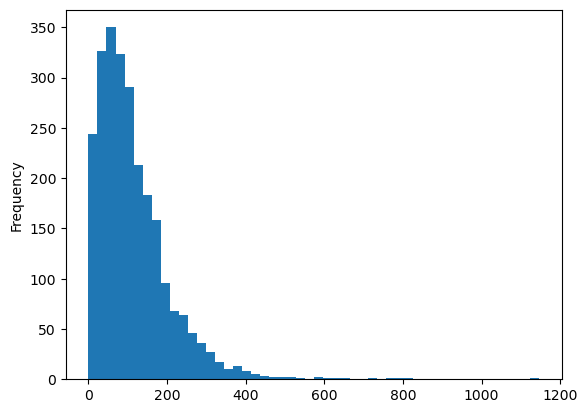

In [41]:
# Plot it as a histogram with 50 bins.
df2['Less than 10 Minutes'].plot.hist(bins=50)

<AxesSubplot: ylabel='Frequency'>

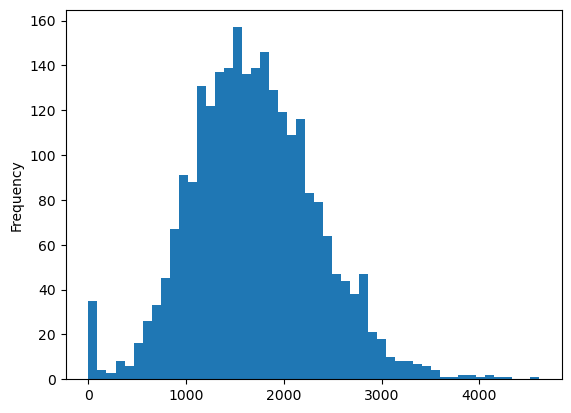

In [43]:
df2['Did Not Work At Home'].plot.hist(bins=50)

<AxesSubplot: >

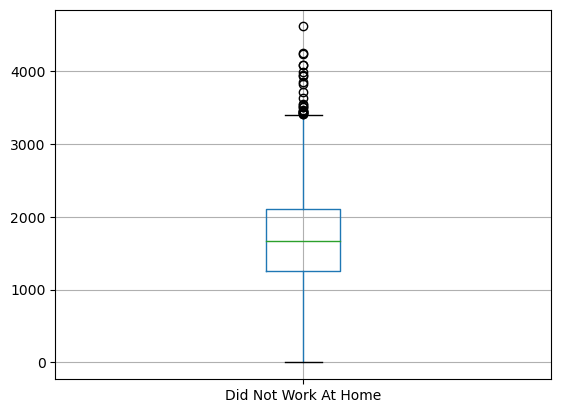

In [46]:
# Box plot of some data
df2.boxplot(column=['Did Not Work At Home'])

<AxesSubplot: xlabel='Less than 10 Minutes', ylabel='90 or More Minutes'>

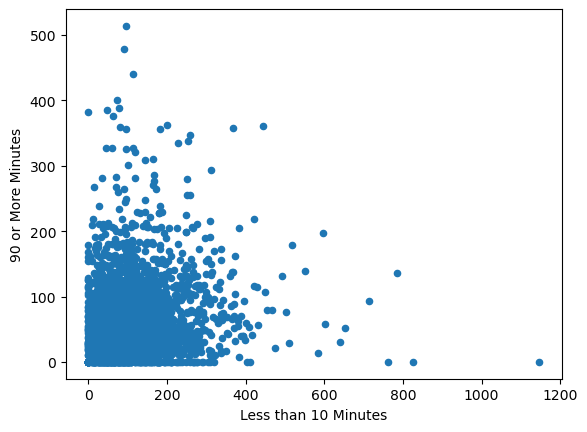

In [49]:
df2.plot.scatter(x='Less than 10 Minutes',y='90 or More Minutes')

### Sorting
In order to understand the areas with the highest and lowest commute times, we can sort the data. 

In [51]:
df_sorted = df2.sort_values(by='Less than 10 Minutes',ascending = False)

In [52]:
# Display the data, but just a few columns
df_sorted[['FIPS','Less than 10 Minutes']].head(10)

,FIPS,Less than 10 Minutes
2059,06037599000,1147
475,06037191201,825
1175,06037320202,785
938,06037265301,762
1495,06037463500,714
1189,06037400605,652
2259,06037701602,640
1034,06037276500,601
1309,06037406103,596
1210,06037401901,584


<AxesSubplot: xlabel='FIPS'>

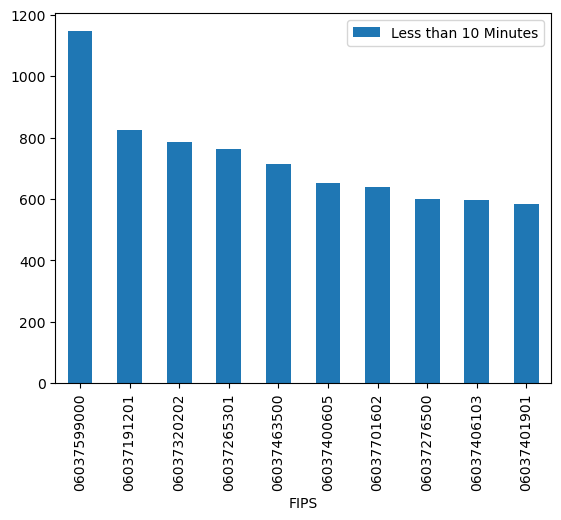

In [53]:
# Plot the data
df_sorted.head(10).plot.bar(x='FIPS', 
                            y='Less than 10 Minutes')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Commutes Less than 10 Minutes in LA County'}, xlabel='FIPS'>

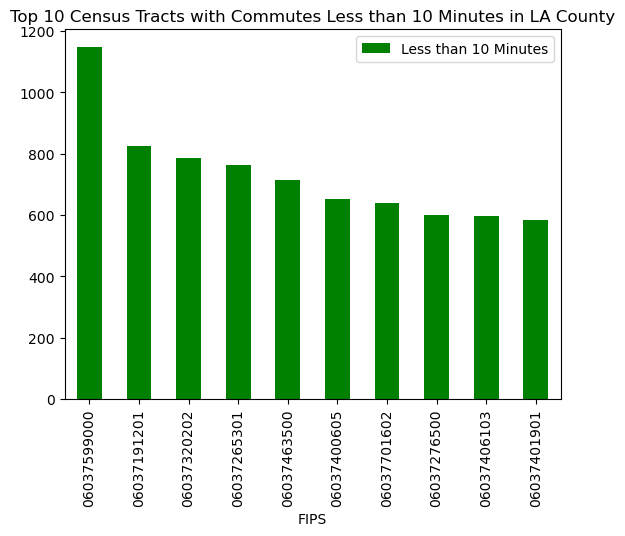

In [54]:
# Add a title
df_sorted.head(10).plot.bar(x='FIPS', 
                            y='Less than 10 Minutes',
                            title='Top 10 Census Tracts with Commutes Less than 10 Minutes in LA County',
                            color='green')

### Filtering and subsetting data

In [55]:
# subset the data so that we can see the data per row
df2[df2['Less than 10 Minutes']==0]

,FIPS,Did Not Work At Home,Less than 10 Minutes,10 to 19 Minutes,20 to 29 Minutes,30 to 39 Minutes,40 to 59 Minutes,60 to 89 Minutes,90 or More Minutes,Worked at Home
13,06037103201,1918,0,493,256,530,339,171,129,99
27,06037104322,862,0,152,291,249,111,31,28,58
247,06037127803,2161,0,464,546,555,203,368,25,210
283,06037132002,1756,0,480,215,387,297,198,179,112
485,06037191710,1036,0,203,127,476,175,45,10,97
486,06037191720,1880,0,135,215,861,406,208,55,59
502,06037194102,1054,0,215,399,142,219,58,21,484
521,06037195902,750,0,166,212,153,59,135,25,287
530,06037199001,828,0,173,170,234,150,47,54,18
571,06037204600,1523,0,313,212,278,448,203,69,89


In [56]:
# Create a new variable for this operation
df_no_less_than_10 = df2[df2['Less than 10 Minutes']==0]

In [59]:
# How many records? 
print('There are ' + str(len(df_no_less_than_10)) + ' census tracts with commutes less than 10 minutes')

There are 86 census tracts with commutes less than 10 minutes


In [60]:
# Display it
df_no_less_than_10[['FIPS','Less than 10 Minutes']]

,FIPS,Less than 10 Minutes
13,06037103201,0
27,06037104322,0
247,06037127803,0
283,06037132002,0
485,06037191710,0
486,06037191720,0
502,06037194102,0
521,06037195902,0
530,06037199001,0
571,06037204600,0


This data isn't particularly useful, but hopefully it is just good practice. 

### Time to make some maps!
First, we need to import the shapefile for the County of LA in geojson format. 

In [61]:
import geopandas as gpd

In [63]:
# read in a geojson file downloaded from LA times. 
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

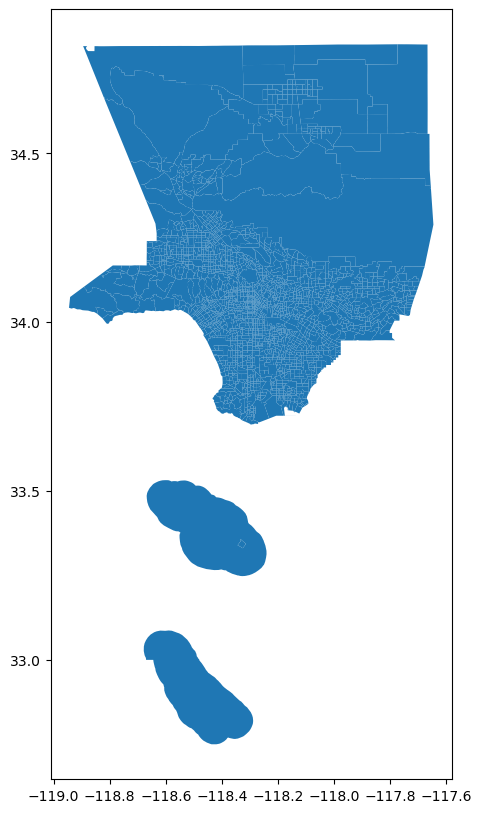

In [66]:
# Plot it
tracts.plot(figsize=(12,10))

In [67]:
# tell me more about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [68]:
# make a subset of FIPS and geometry
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [71]:
# create a FIPS column
tracts['FIPS'] = '06' + '037' + tracts['CT20']

In [72]:
# check it! 
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


### Merging / Joining the data
Now we're going to merge the social explorer data from the Census tract geojson file

In [73]:
# creae a new dataframe based on teh join
tracts_race=tracts.merge(df2,on="FIPS")

In [74]:
# what does it look like now? 
tracts_race.head()

,CT20,geometry,FIPS,Did Not Work At Home,Less than 10 Minutes,10 to 19 Minutes,20 to 29 Minutes,30 to 39 Minutes,40 to 59 Minutes,60 to 89 Minutes,90 or More Minutes,Worked at Home
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,1862,129,290,527,256,379,229,52,75
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,1712,74,129,413,360,447,211,78,265
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,1632,206,252,216,392,432,128,6,95
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1658,108,244,336,400,293,201,76,0
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,1084,98,254,283,295,91,63,0,9


We can now create choropleth maps in geopandas

<AxesSubplot: >

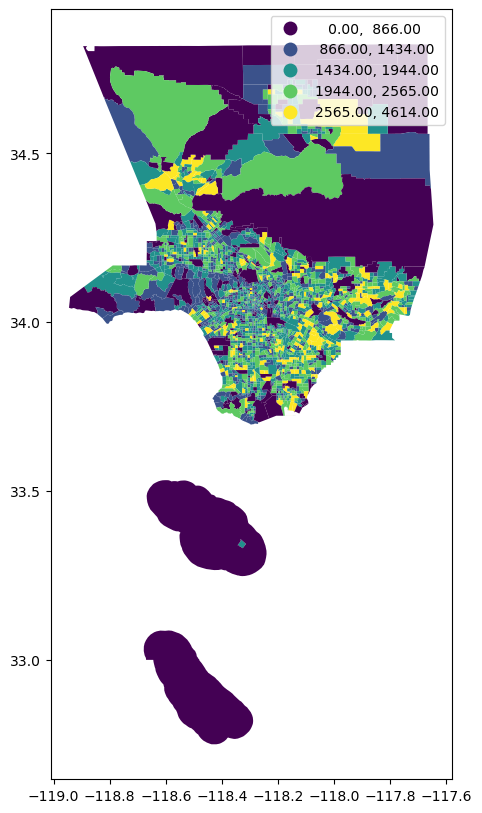

In [79]:
tracts_race.plot(figsize=(12,10),
    column='Did Not Work At Home',
    legend=True,
    scheme='NaturalBreaks')

<AxesSubplot: >

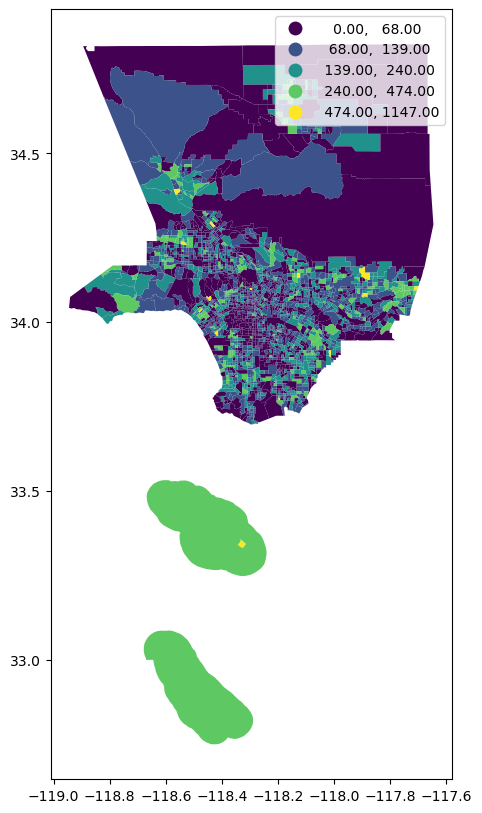

In [80]:
tracts_race.plot(figsize=(12,10),
    column='Less than 10 Minutes',
    legend=True,
    scheme='NaturalBreaks')

<AxesSubplot: >

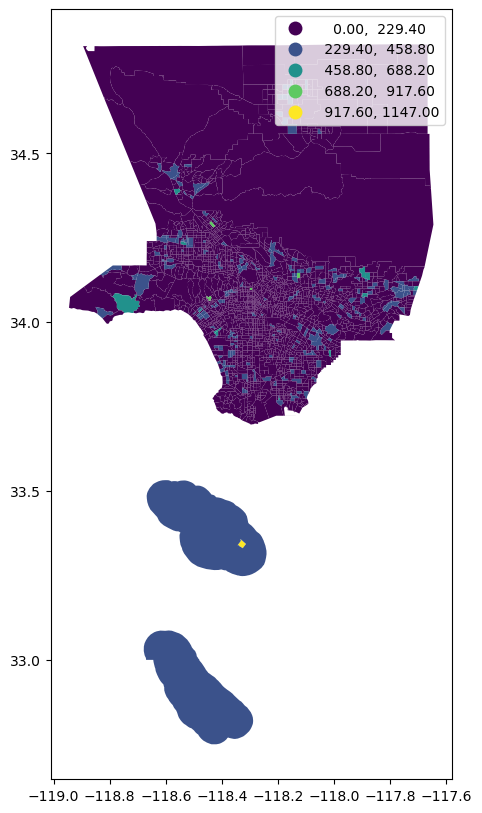

In [81]:
tracts_race.plot(figsize=(12,10),
    column='Less than 10 Minutes',
    legend=True,
    scheme='equal_interval')

<AxesSubplot: >

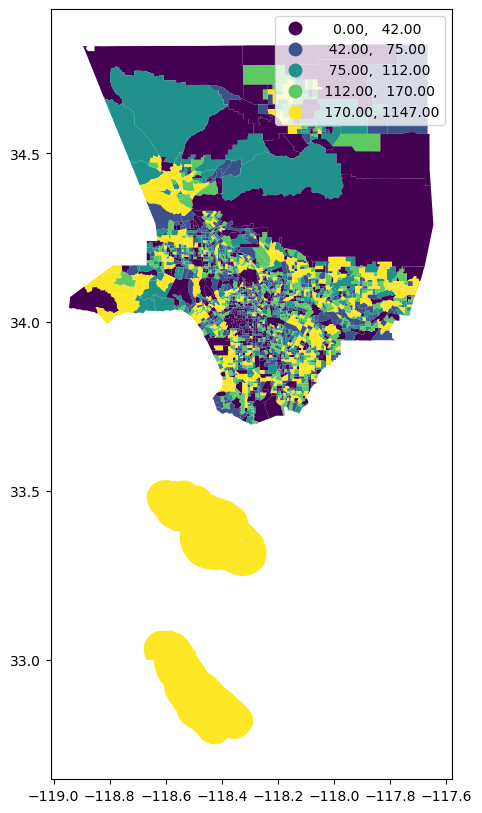

In [82]:
tracts_race.plot(figsize=(12,10),
    column='Less than 10 Minutes',
    legend=True,
    scheme='quantiles')

<AxesSubplot: >

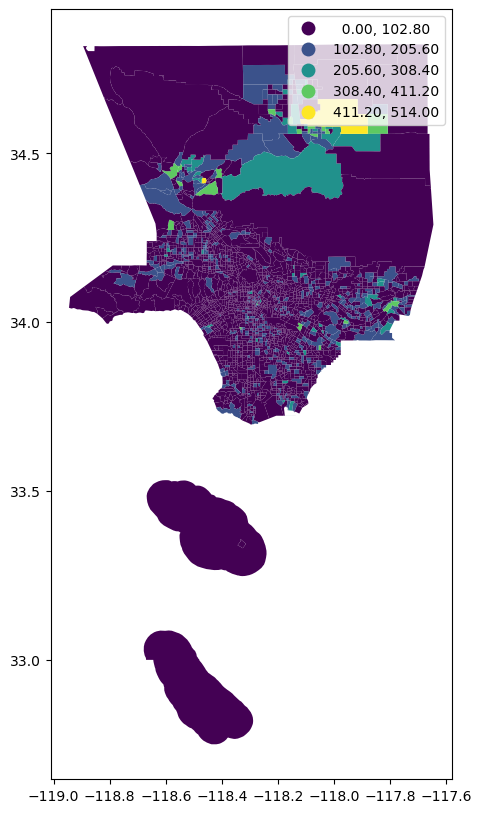

In [83]:
tracts_race.plot(figsize=(12,10),
    column='90 or More Minutes',
    legend=True,
    scheme='equal_interval')